#**FEATURE ENGINEERING**





---
# **6. Feature Engineering**
Transforming raw data into useful features that help us to understand our model better and increase its predictive power. If the features derived are meaningful then they become a deciding factor in increasing the model’s accuracy significantly. Steps taken are as below:
* Convert categorical to numerical
* Check outliers & Impute outliers
* Feature transformation
* Feature scaling



In [ ]:
# drive module for mounting gdrive storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis'

Mounted at /content/gdrive
/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis


In [ ]:
# basic libraries for statistics and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load preprocessed data from CSV files
df = pd.read_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/pre_processed_data.csv')

## **6.1 Converting Categorical to Numerical Data Types**

## Methods Used:

**1. Mannual Encoding:** Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

**2. Frequency Encoding:** Technique used to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts. Used when the frequency of a category might carry meaningful information for prediction.

**3. Label Encoding:** Converts each category into a unique numeric integer. Used when there is no inherent order in the categories, and the model can handle numerical representations directly.

**4. One hot Encoding:** Used when there are less than 3 categories. Creates a new binary column for each category, where a value of 1 indicates the presence of the category and 0 indicates absence.

### **6.1.1 Gender**

In [ ]:
# check value counts of unencoded Gender feature
df['Gender'].value_counts()

,count
Gender,
Male,725
Female,475


In [ ]:
# Manual encoding Gender feature
df.Gender = df.Gender.map({'Male':1,'Female':0})

In [ ]:
# check encoded value counts of gender
df.Gender.value_counts()

,count
Gender,
1,725
0,475


### **6.1.2 MaritalStatus**

In [ ]:
# check value counts of unencoded MaritalStatus feature
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,548
Single,384
Divorced,268


In [ ]:
# manual encoding MaritalStatus feature
df.MaritalStatus = df.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [ ]:
# check encoded value counts of gender
df.MaritalStatus.value_counts()

,count
MaritalStatus,
2,548
1,384
0,268


### **6.1.3 Education Background**

In [ ]:
# check value counts of unencoded EducationBackground feature

df.EducationBackground.value_counts()

,count
EducationBackground,
Life Sciences,492
Medical,384
Marketing,137
Technical Degree,100
Other,66
Human Resources,21


In [ ]:
# Frequency Encoding EducationBackground
df.loc[df['EducationBackground']=='Life Sciences','EducationBackground']=5
df.loc[df['EducationBackground']=='Medical','EducationBackground']=4
df.loc[df['EducationBackground']=='Marketing','EducationBackground']=3
df.loc[df['EducationBackground']=='Technical Degree','EducationBackground']=2
df.loc[df['EducationBackground']=='Other','EducationBackground']=1
df.loc[df['EducationBackground']=='Human Resources','EducationBackground']=0

In [ ]:
# check encoded value counts of EducationBackground
df.EducationBackground.value_counts()

,count
EducationBackground,
5,492
4,384
3,137
2,100
1,66
0,21


### **6.1.4 Employee Department**

In [ ]:
# check value counts of unencoded EducationBackground feature

df.EmpDepartment.value_counts()

,count
EmpDepartment,
Sales,373
Development,361
Research & Development,343
Human Resources,54
Finance,49
Data Science,20


In [ ]:
# Frequency encoding EmpDepartment feature
df.loc[df['EmpDepartment']=='Sales','EmpDepartment']=5
df.loc[df['EmpDepartment']=='Development','EmpDepartment']=4
df.loc[df['EmpDepartment']=='Research & Development','EmpDepartment']=3
df.loc[df['EmpDepartment']=='Human Resources','EmpDepartment']=2
df.loc[df['EmpDepartment']=='Finance','EmpDepartment']=1
df.loc[df['EmpDepartment']=='Data Science','EmpDepartment']=0

In [ ]:
# check encoded value counts of EmpDepartment
df.EmpDepartment.value_counts()

,count
EmpDepartment,
5,373
4,361
3,343
2,54
1,49
0,20


### **6.1.5 Employee Job Role**

In [ ]:
# Check value counts of unencoded EmpJobRole feature
df.EmpJobRole.value_counts()

,count
EmpJobRole,
Sales Executive,270
Developer,236
Manager R&D,94
Research Scientist,77
Sales Representative,69
Laboratory Technician,64
Senior Developer,52
Manager,51
Finance Manager,49


In [ ]:
# Frequency encoding EmpJobRole feature
df.loc[df['EmpJobRole']=='Sales Executive','EmpJobRole']=18
df.loc[df['EmpJobRole']=='Developer','EmpJobRole']=17
df.loc[df['EmpJobRole']=='Manager R&D','EmpJobRole']=16
df.loc[df['EmpJobRole']=='Research Scientist','EmpJobRole']=15
df.loc[df['EmpJobRole']=='Sales Representative','EmpJobRole']=14
df.loc[df['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
df.loc[df['EmpJobRole']=='Senior Developer','EmpJobRole']=12
df.loc[df['EmpJobRole']=='Manager','EmpJobRole']=11
df.loc[df['EmpJobRole']=='Finance Manager','EmpJobRole']=10
df.loc[df['EmpJobRole']=='Human Resources','EmpJobRole']=9
df.loc[df['EmpJobRole']=='Technical Lead','EmpJobRole']=8
df.loc[df['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
df.loc[df['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
df.loc[df['EmpJobRole']=='Data Scientist','EmpJobRole']=5
df.loc[df['EmpJobRole']=='Research Director','EmpJobRole']=4
df.loc[df['EmpJobRole']=='Business Analyst','EmpJobRole']=3
df.loc[df['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
df.loc[df['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
df.loc[df['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [ ]:
# check encoded value counts of EmpJobRole
df.EmpJobRole.value_counts()

,count
EmpJobRole,
18,270
17,236
16,94
15,77
14,69
13,64
12,52
11,51
10,49


### **6.1.6 Business Travel Frequency**

In [ ]:
# Check value count of unencoded BuisnessTravelFrequency feature
df.BusinessTravelFrequency.value_counts()

,count
BusinessTravelFrequency,
Travel_Rarely,846
Travel_Frequently,222
Non-Travel,132


In [ ]:
# Manual encoding BusinessTravelFrequency feature
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [ ]:
# Check encoded value_count for BusinessTravelFrequency
df.BusinessTravelFrequency.value_counts()

,count
BusinessTravelFrequency,
2,846
1,222
0,132


### **6.1.7 OverTime**

In [ ]:
# Check value count of Overtime feature
df.OverTime.value_counts()

,count
OverTime,
No,847
Yes,353


In [ ]:
# Manual Encoding OverTime feature
df.OverTime = df.OverTime.map({'No':1,'Yes':0})

In [ ]:
# Check encoded value_count for OverTime
df.OverTime.value_counts()

,count
OverTime,
1,847
0,353


### **6.1.8 Attrition**

In [ ]:
# Check value counts for Attrition
df.Attrition.value_counts()

,count
Attrition,
No,1022
Yes,178


In [ ]:
# Manual encoding Attrition feature
df.Attrition = df.Attrition.map({'No':1,'Yes':0})

In [ ]:
# Check encoded value_count for Attrition
df.Attrition.value_counts()

,count
Attrition,
1,1022
0,178


### **6.1.9 Check head and tail for new dataset**

In [ ]:
# chech head and tail for new dataset
display(df.head())

print('='*150)

display(df.tail())

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,1,5,18,2,10,3,4,...,4,10,2,2,10,7,0,8,1,3
1,47,1,3,1,5,18,2,14,4,4,...,4,20,2,3,7,7,1,7,1,3
2,40,1,5,2,5,18,1,5,4,4,...,3,20,2,3,18,13,1,12,1,4
3,41,1,0,0,2,11,2,10,4,2,...,2,23,2,2,21,6,12,6,1,3
4,60,1,3,1,5,18,2,16,4,1,...,4,10,1,3,2,2,2,2,1,3


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,27,0,4,0,5,18,1,3,1,4,...,2,6,3,3,6,5,0,4,1,4
1196,37,1,5,1,4,12,2,10,2,4,...,1,4,2,3,1,0,0,0,1,3
1197,50,1,4,2,4,12,2,28,1,4,...,3,20,3,3,20,8,3,8,1,3
1198,34,0,4,1,0,5,2,9,3,4,...,2,9,3,4,8,7,7,7,1,3
1199,24,0,5,1,5,18,2,3,2,1,...,1,4,3,3,2,2,2,0,0,2


In [ ]:
# Print shape
print(df.shape)

(1200, 27)


**Note:** Features have reduced to 27 since we dropped EmpNumber.

In [ ]:
# check data types for columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   int64 
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   int64 
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   int64 
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [ ]:
# Convert object columns to int64
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

In [ ]:
# check data types for columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int64
 2   EducationBackground           1200 non-null   Int64
 3   MaritalStatus                 1200 non-null   int64
 4   EmpDepartment                 1200 non-null   Int64
 5   EmpJobRole                    1200 non-null   Int64
 6   BusinessTravelFrequency       1200 non-null   int64
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

### **6.1.10 Save the processed dataset**

In [ ]:
# save df as csv in current directory

df.to_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/processed_data.csv', index=False)

In [ ]:
# load preprocessed data from CSV files
df = pd.read_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/processed_data.csv')

## **6.2 Handling Outliers**

Finding outliers in a dataset follows a process that combines multiple techniques performed during exploratory data analysis. Techniques below help to find and manage outliers in a dataset:

* **Data Visualization techniques:** used to inspect the data’s distribution and verify the presence of outliers,

* **Statistical Methods:** used to calculate the outlier data points,

* **Handle outliers using statistical methods:** techniques we can use to handle outliers are listed below.
 - Drop the outliers,
 - Cap the outliers,
 - Impute the outliers - Replace outliers using imputation as if they were missing values.

### **6.2.1 Visualizing Outliers**

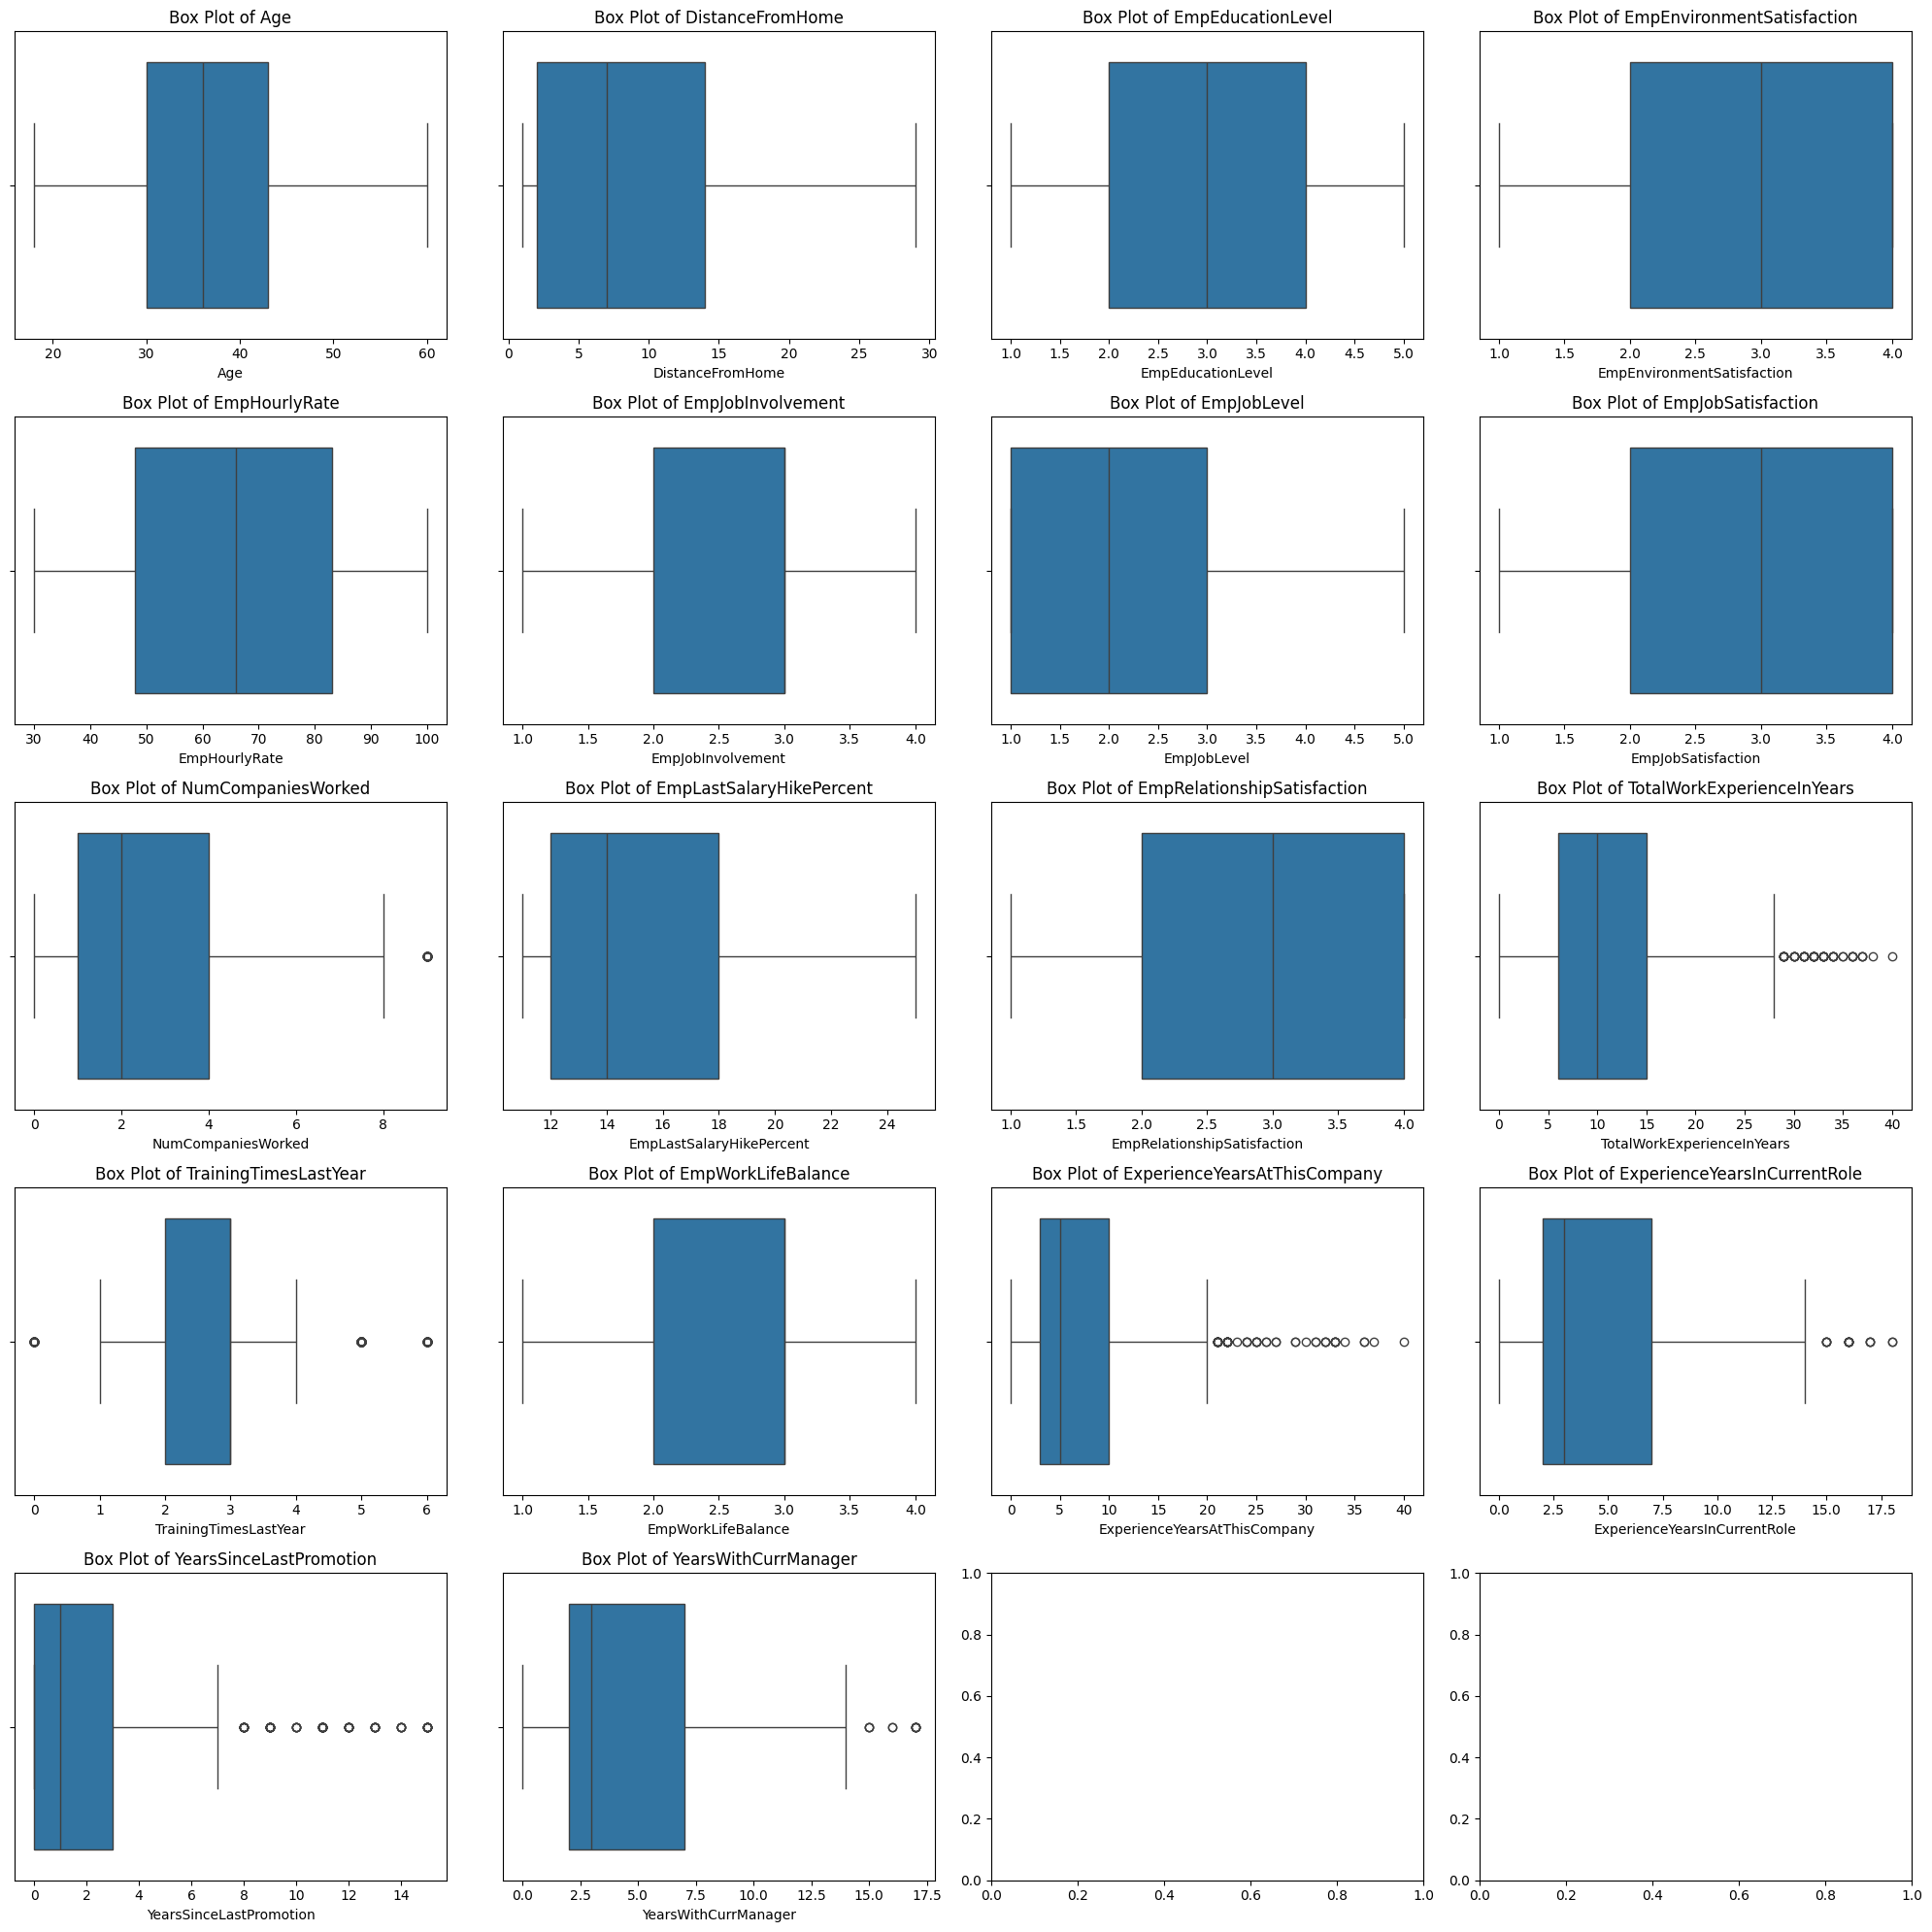

In [ ]:
# using box plots to show distributions of numeric data values so as to detect the outliers
features = ['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction',
               'EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
               'NumCompaniesWorked','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
               'YearsWithCurrManager']

num_rows = 5
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

* The box plots reveal that the following features have outliers:
 - NumCompaniesWorked,
 - TotalWorkExperienceInYears,
 - TrainingTimesLastYear,
 - ExperienceYearsAtThisCompany,
 - ExperienceYearsInCurrentRole,
 - YearsSinceLastPromotion,
 - YearsWithCurrManager.

* We use inter quatile range (IQR) to impute outliers becuase data is not normally distributed.

### **6.2.2 Outliers in NumCompaniesWorked**

In [ ]:
# Find IQR
iqr = stats.iqr(df['NumCompaniesWorked'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['NumCompaniesWorked'].quantile(0.25)
Q3 = df['NumCompaniesWorked'].quantile(0.75)

# Get lower and upper limits
min_limit = Q1 - 1.5*iqr
print("Lower Limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Upper Limit:",max_limit)

IQR: 3.0
Lower Limit: -3.5
Upper Limit: 8.5


In [ ]:
# since data is not normally distributed, we'll replace outliers with median
df.loc[df['NumCompaniesWorked'] > max_limit,'NumCompaniesWorked']=df['NumCompaniesWorked'].median()
df.loc[df['NumCompaniesWorked'] < min_limit,'NumCompaniesWorked']=df['NumCompaniesWorked'].median()

<Axes: xlabel='NumCompaniesWorked'>

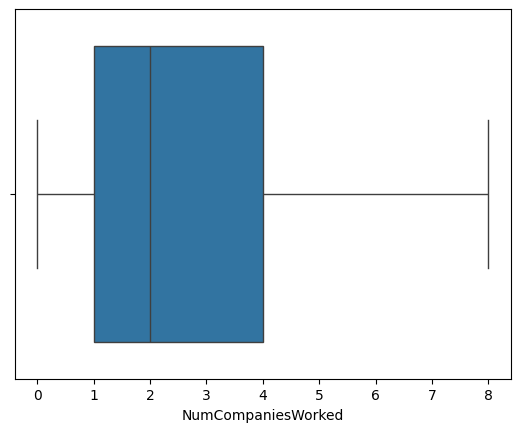

In [ ]:
# Check if there are still any outliers in NumCompaniesWorked
sns.boxplot(x=df.NumCompaniesWorked)

### **6.2.3 Outliers in TotalWorkExperienceInYears**

In [ ]:
# Find IQR
iqr = stats.iqr(df['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

# Get lower and upper limits
min_limit = Q1 - 1.5*iqr
print("Lower Limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Upper Limit:",max_limit)

IQR: 9.0
Lower Limit: -7.5
Upper Limit: 28.5


In [ ]:
# since data is not normally distributed, we'll replace outliers with median
df.loc[df['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()
df.loc[df['TotalWorkExperienceInYears'] < min_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

<Axes: xlabel='TotalWorkExperienceInYears'>

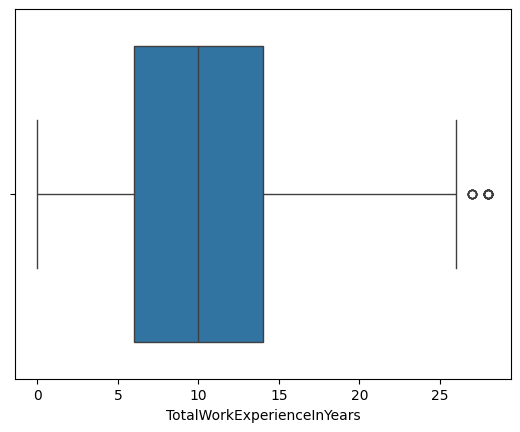

In [ ]:
# Check if there are still any outliers in TotalWorkExperienceInYears
sns.boxplot(x=df.TotalWorkExperienceInYears)

### **6.2.4 Outliers in TrainingTimesLastYear**

In [ ]:
# Find IQR
iqr = stats.iqr(df['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)

# Get lower and upper limits
min_limit = Q1 - 1.5*iqr
print("Lower Limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Upper Limit:",max_limit)

IQR: 1.0
Lower Limit: 0.5
Upper Limit: 4.5


In [ ]:
# since data is not normally distributed, we'll replace outliers with median
df.loc[df['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

<Axes: xlabel='TrainingTimesLastYear'>

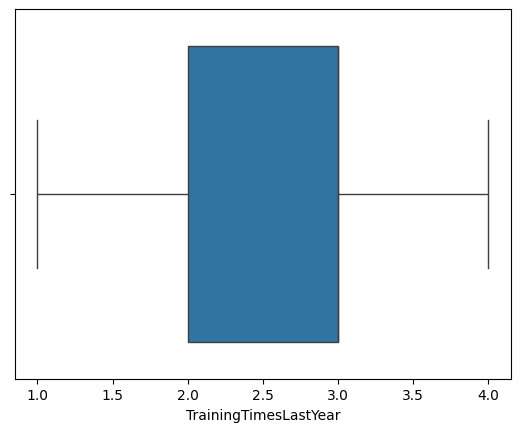

In [ ]:
# Check if there are still any outliers in TrainingTimesLastYear
sns.boxplot(x=df.TrainingTimesLastYear)

### **6.2.5 Outliers in ExperienceYearsAtThisCompany**

In [ ]:
# Find IQR
iqr = stats.iqr(df['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get lower and upper limits
min_limit = Q1 - 1.5*iqr
print("Lower Limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Upper Limit:",max_limit)

IQR: 7.0
Lower Limit: -7.5
Upper Limit: 20.5


In [ ]:
# since data is not normally distributed, we'll replace outliers with median
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()
df.loc[df['ExperienceYearsAtThisCompany'] < min_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

<Axes: xlabel='ExperienceYearsAtThisCompany'>

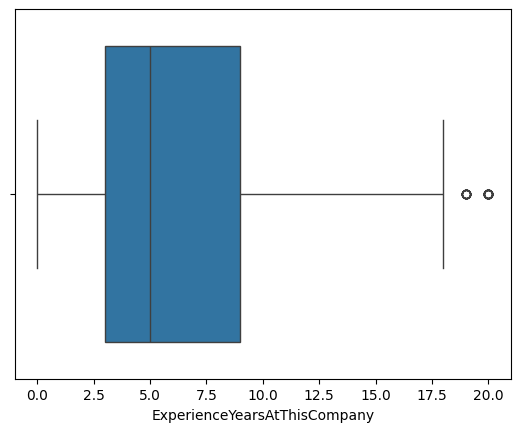

In [ ]:
# Check if there are still any outliers in ExperienceYearsAtThisCompany
sns.boxplot(x=df.ExperienceYearsAtThisCompany)

### **6.2.6 Outliers in ExperienceYearsInCurrentRole**

In [ ]:
# Find IQR
iqr = stats.iqr(df['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get lower and upper limits
min_limit = Q1 - 1.5*iqr
print("Lower Limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Upper Limit:",max_limit)

IQR: 5.0
Lower Limit: -5.5
Upper Limit: 14.5


In [ ]:
# since data is not normally distributed, we'll replace outliers with median
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole']=df['ExperienceYearsInCurrentRole'].median()
df.loc[df['ExperienceYearsInCurrentRole'] < min_limit,'ExperienceYearsInCurrentRole']=df['ExperienceYearsInCurrentRole'].median()

<Axes: xlabel='ExperienceYearsInCurrentRole'>

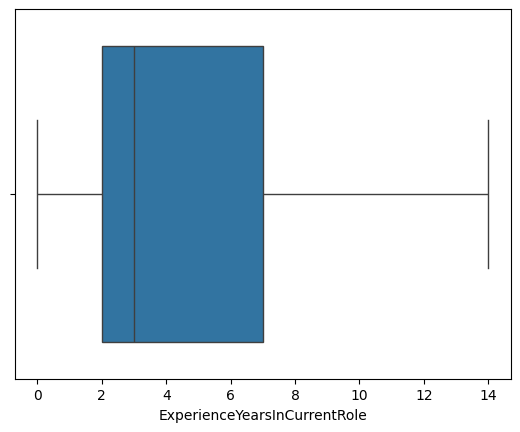

In [ ]:
# Check if there are still any outliers in ExperienceYearsInCurrentRole
sns.boxplot(x=df.ExperienceYearsInCurrentRole)

### **6.2.7 Outliers in YearsSinceLastPromotion**

In [ ]:
# Find IQR
iqr = stats.iqr(df['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)

# Get lower and upper limits
min_limit = Q1 - 1.5*iqr
print("Lower Limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Upper Limit:",max_limit)

IQR: 3.0
Lower Limit: -4.5
Upper Limit: 7.5


In [ ]:
# since data is not normally distributed, we'll replace outliers with median
df.loc[df['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()
df.loc[df['YearsSinceLastPromotion'] < min_limit,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()

<Axes: xlabel='YearsSinceLastPromotion'>

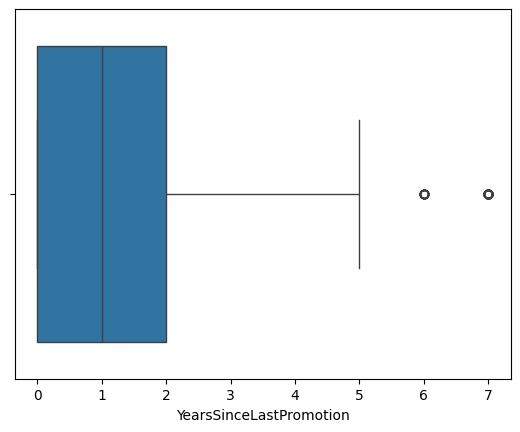

In [ ]:
# Check if there are still any outliers in YearsSinceLastPromotion
sns.boxplot(x=df.YearsSinceLastPromotion)

### **6.2.8 Outliers in YearsWithCurrManager**

In [ ]:
# Find IQR
iqr = stats.iqr(df['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

# Get lower and upper limits
min_limit = Q1 - 1.5*iqr
print("Lower Limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Upper Limit:",max_limit)

IQR: 5.0
Lower Limit: -5.5
Upper Limit: 14.5


In [ ]:
# since data is not normally distributed, we'll replace outliers with median
df.loc[df['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()
df.loc[df['YearsWithCurrManager'] < min_limit,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

<Axes: xlabel='YearsWithCurrManager'>

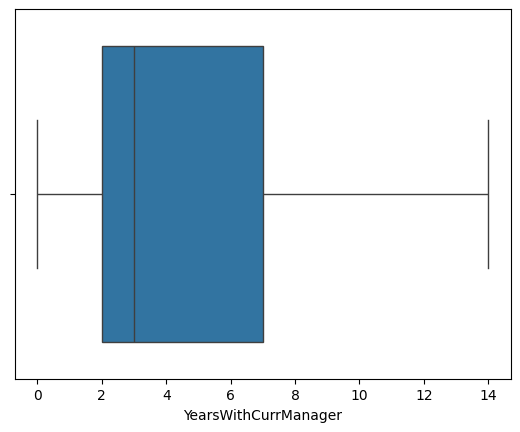

In [ ]:
# Check if there are still any outliers in YearsWithCurrManager
sns.boxplot(x=df.YearsWithCurrManager)

## **6.3 Feature Transformation**

### **6.3.1 Persistent Outliers**

The following features still show persistent outliers after attempting to handle them using the Interquartile Range (IQR) method:
- TotalWorkExperienceInYears,
- ExperienceYearsAtThisCompany,
- YearsSinceLastPromotion.

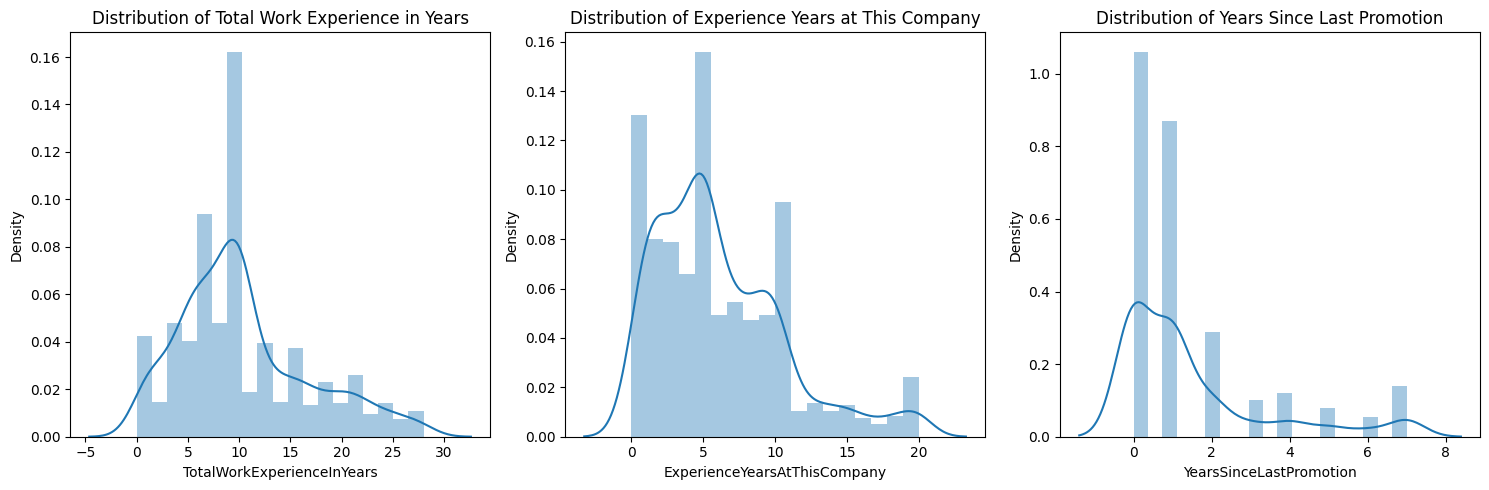

In [ ]:
# show distribution plots for features with persistent outliers

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.distplot(df['TotalWorkExperienceInYears'])
plt.title('Distribution of Total Work Experience in Years')

plt.subplot(1, 3, 2)
sns.distplot(df['ExperienceYearsAtThisCompany'])
plt.title('Distribution of Experience Years at This Company')

plt.subplot(1, 3, 3)
sns.distplot(df['YearsSinceLastPromotion'])
plt.title('Distribution of Years Since Last Promotion')

plt.tight_layout()
plt.show()

 There is skewness in the features' distribution, so we are going to use square root transformation.

### **6.3.2 Square root Transformation**

Square root transformation is useful for stabilizing variance and reducing the impact of high outliers.

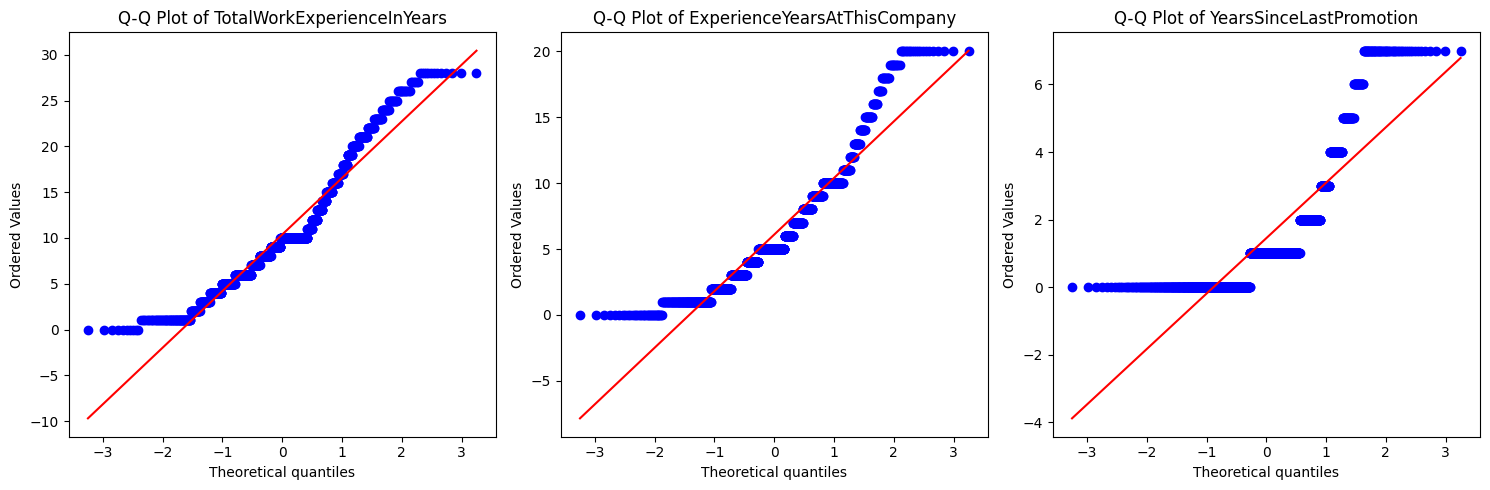

In [ ]:
# function to plot Q-Q plots for the features with persistent outliers

def plot_qq_plots(df):
    """Generates Q-Q plots for specified features and displays them side by side.

    Args:
        df: The input DataFrame containing the features.
    """
    features = ['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'YearsSinceLastPromotion']
    plt.figure(figsize=(15, 5))

    for i, feature in enumerate(features):
        plt.subplot(1, 3, i + 1)
        stats.probplot(df[feature], dist="norm", plot=pylab)
        plt.title(f'Q-Q Plot of {feature}')

    plt.tight_layout()
    plt.show()

# Assuming your DataFrame is named 'df'
plot_qq_plots(df)

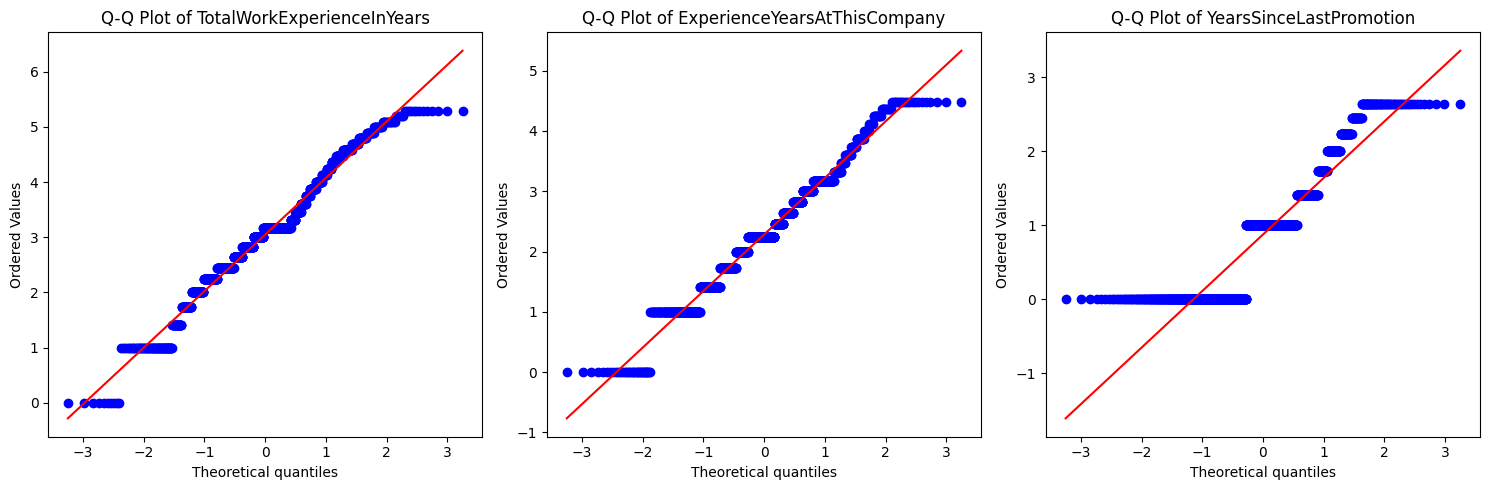

In [ ]:
# Perform square root transformation
for feature in ['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'YearsSinceLastPromotion']:
    df[feature] = np.sqrt(df[feature])

# Plot the Q-Q plots again after the transformation
plot_qq_plots(df)

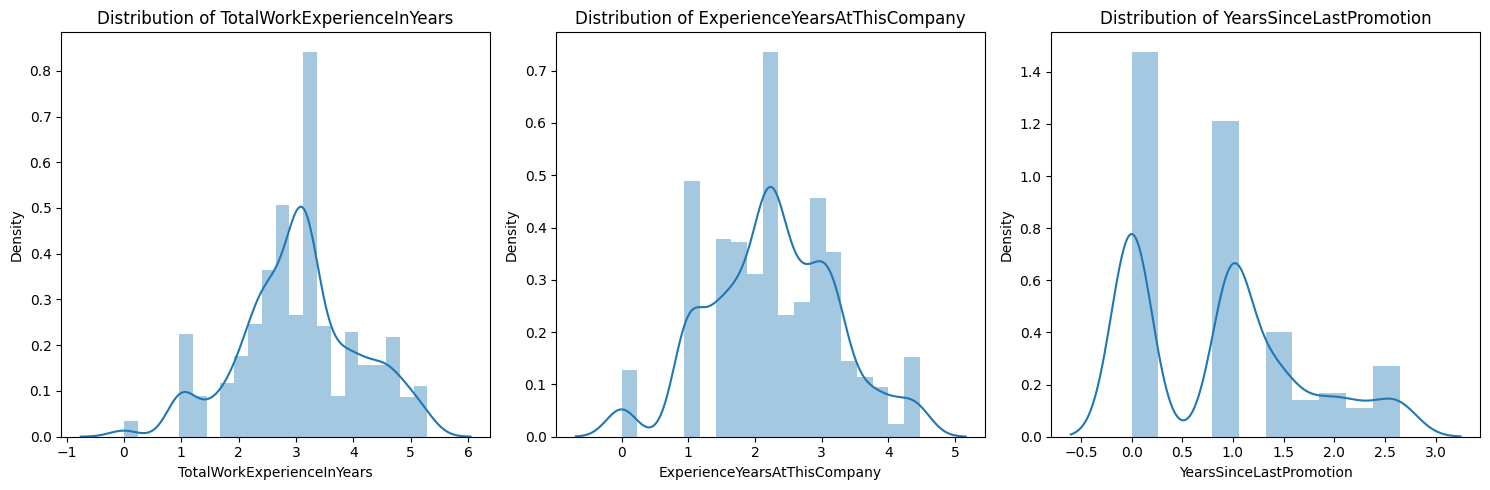

In [ ]:
# distribution plots for all features with square root transformed data

features = ['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'YearsSinceLastPromotion']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.distplot(df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## **6.4 Feature Scaling**

Standard Feature Scaling (also known as Standardization) is a preprocessing technique used to transform numerical features so that they have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model, especially when features have different units or ranges. It avoids dominance of large-scale features over small-scale ones.

### **6.4.1 Standard Scaling**

In [ ]:
# Perform standard feature scaling

# Define the features to scale
num_features = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
                     'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
                     'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
                     'YearsWithCurrManager', 'YearsSinceLastPromotion']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected features
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
# chech head and tail for scaled dataset
display(df.head())

print('='*150)

display(df.tail())

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,1,3,1,5,18,2,0.102061,3,4,...,4,0.108373,-0.879579,2,0.931441,0.864098,-1.057559,1.202103,1,3
1,1.109888,1,3,1,5,18,2,0.591464,4,4,...,4,1.375596,-0.879579,3,0.385060,0.864098,0.151501,0.902825,1,3
2,0.339260,1,5,2,5,18,1,-0.509693,4,4,...,3,1.375596,-0.879579,3,2.074247,2.661702,0.151501,2.399219,1,4
3,0.449349,1,0,0,2,11,2,0.102061,4,2,...,2,1.688755,-0.879579,2,-0.048302,0.564498,0.151501,0.603546,1,3
4,2.541054,1,3,1,5,18,2,0.836165,4,1,...,4,0.108373,-2.303999,3,-0.917658,-0.633905,0.652311,-0.593570,1,3


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,-1.091906,0,4,0,5,18,1,-0.754394,1,4,...,2,-0.581214,0.544841,3,0.177455,0.264897,-1.057559,0.004988,1,4
1196,0.008991,1,5,1,4,12,2,0.102061,2,4,...,1,-1.016074,-0.879579,3,-1.355813,-1.233106,-1.057559,-1.192127,1,3
1197,1.440157,1,4,2,4,12,2,2.304373,1,4,...,3,1.375596,0.544841,3,2.317007,1.163699,1.036595,1.202103,1,3
1198,-0.321278,0,4,1,0,5,2,-0.020290,3,4,...,2,-0.048623,0.544841,4,0.578295,0.864098,2.141314,0.902825,1,3
1199,-1.422176,0,5,1,5,18,2,-0.754394,2,1,...,1,-1.016074,0.544841,3,-0.917658,-0.633905,0.652311,-1.192127,0,2


## **6.5 Feature Selection**

### **6.5.1 Top 3 Factors Affecting Employee Performance**

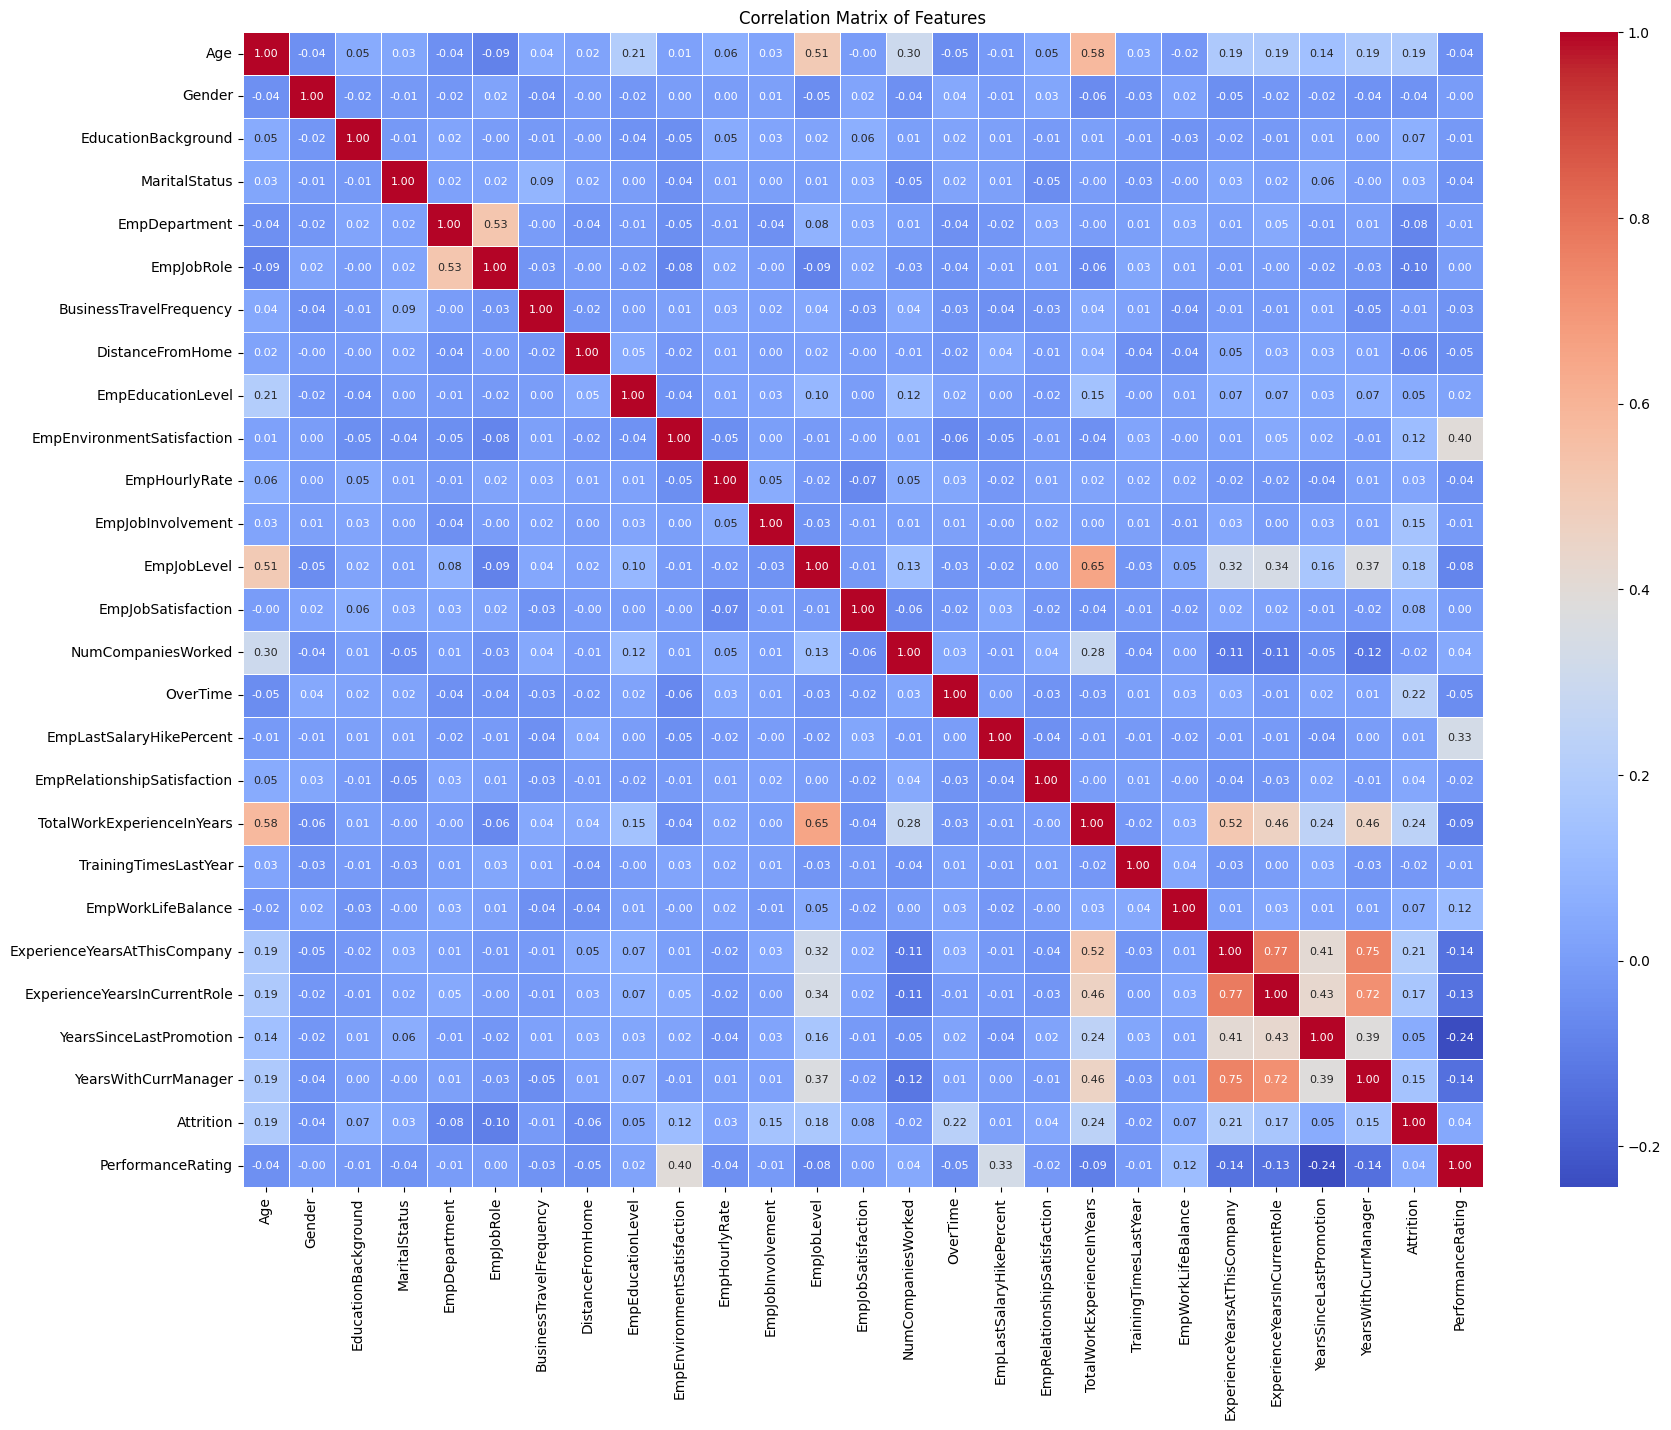

In [ ]:
# heat map to show correlation for df

plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"fontsize":8}) # Adjust fontsize as needed
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# create a correlation matrix for df and order the data in descending order

correlation_matrix = df.corr()

# Order the correlations in descending order
ordered_correlations = correlation_matrix['PerformanceRating'].abs().sort_values(ascending=False)

# Print or use the ordered correlations
print(ordered_correlations)

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.243883
YearsWithCurrManager            0.139947
ExperienceYearsAtThisCompany    0.135162
ExperienceYearsInCurrentRole    0.132773
EmpWorkLifeBalance              0.124429
TotalWorkExperienceInYears      0.094800
EmpJobLevel                     0.076632
OverTime                        0.050206
DistanceFromHome                0.046142
NumCompaniesWorked              0.044320
EmpHourlyRate                   0.043116
Age                             0.040164
Attrition                       0.039796
MaritalStatus                   0.039682
BusinessTravelFrequency         0.031025
EmpEducationLevel               0.020529
EmpRelationshipSatisfaction     0.019502
EducationBackground             0.010804
EmpJobInvolvement               0.010539
TrainingTimesLastYear           0.006214
EmpDepartment                   0.005205
EmpJobRole      

**Insights**

* We can observe that the following features have a significant impact on Employee Performance:
 - EmpEnvironmentSatisfaction,
 - EmpLastSalaryHikePercent,
 - YearsSinceLastPromotion,
 - YearsWithCurrManager,
 - ExperienceYearsAtThisCompany,
 - ExperienceYearsInCurrentRole,
 - EmpWorkLifeBalance.

* The least impactful features are:
 - TrainingTimesLastYear,
 - EmpDepartment,
 - EmpJobRole,
 - Gender,
 - EmpJobSatisfaction.

* **The top 3 factors affecting employee performance are:**
 - _EmpEnvironmentSatisfaction_,
 - _EmpLastSalaryHikePercent_,
 - _YearsSinceLastPromotion_,

### **6.5.2 Save Standardized Data Frame**

In [ ]:
# save df as csv in current directory

df.to_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/scaled_data.csv', index=False)

## **6.6 Principal Component Analysis**

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset into a smaller set of uncorrelated variables called principal components, which capture the maximum variance in the data.

### **6.6.1 Getting Optimal Value for PCA**

In [ ]:
# load standardized data from CSV files
df = pd.read_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/scaled_data.csv')

In [ ]:
# check shape of standardized data
df.shape

(1200, 27)

Our dataset has more than 25 features, so we need to apply PCA in order to reduce noise in the data which may affect our model performance.

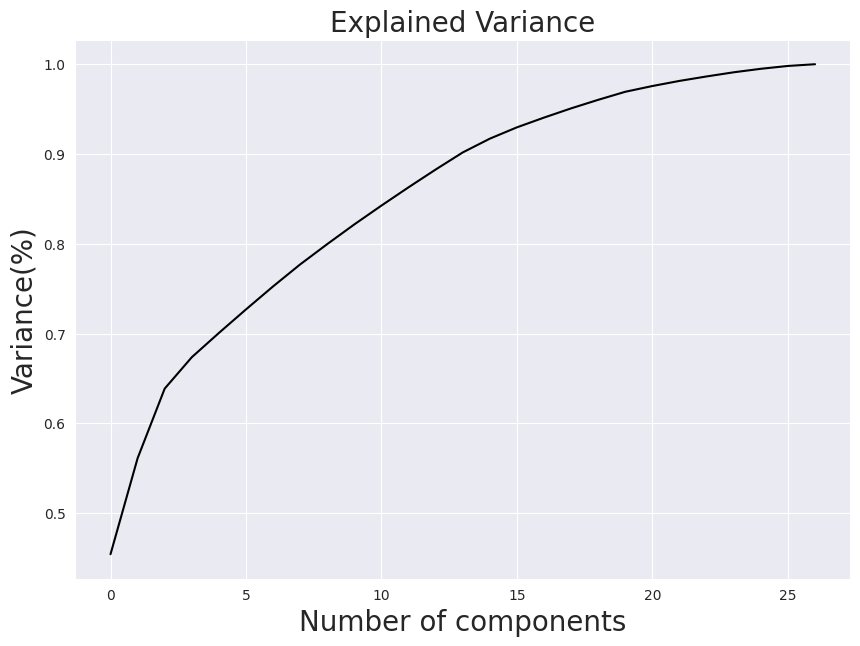

In [ ]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

**Insight**

 PCA shows that 25 features have less varaince loss, so we are going to select 25 features.

In [ ]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(df)
new_data

array([[ 4.45767672, -1.3667122 ,  1.24519075, ...,  0.54251203,
         0.17444908, -0.29702176],
       [ 4.35445171,  0.32261377,  2.00641101, ...,  0.62490203,
        -0.09344355, -0.76241985],
       [ 4.27405623,  2.98637002,  3.82786832, ...,  0.23691777,
        -0.80217673,  0.22281392],
       ...,
       [-1.65104617, -1.28112504,  2.9011626 , ...,  0.30039552,
        -0.55267004,  0.62554903],
       [-9.13350552, -1.71109535,  1.77633445, ..., -0.52423013,
         0.36091156, -0.15617867],
       [ 4.56241663, -0.80240548, -1.57181878, ..., -0.57179383,
         0.18811379, -0.0733337 ]])

### **6.6.2 Create PCA Data Frame**

In [ ]:
pca_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Include target veriable to preprocessed dataframe for model building & evaluation
pca_df['PerformanceRating']=df.PerformanceRating

pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,4.457677,-1.366712,1.245191,-0.934923,1.151176,0.691766,0.965128,1.392092,0.466587,-0.459494,...,-0.867073,-0.150942,0.465075,-0.010234,-0.086346,-0.211241,0.542512,0.174449,-0.297022,3
1,4.354452,0.322614,2.006411,-1.503321,0.026969,-0.958660,1.558917,-0.219267,0.899079,-0.923479,...,-0.558585,0.357000,-0.462485,0.964303,0.258629,-0.273413,0.624902,-0.093444,-0.762420,3
2,4.274056,2.986370,3.827868,0.210795,1.738617,-0.725024,-0.293803,-1.106182,0.450945,-1.953939,...,0.735923,-0.497544,-0.548766,-0.216602,-0.156165,0.349514,0.236918,-0.802177,0.222814,4
3,-3.004228,1.229310,2.176705,-3.279669,-1.880958,2.380688,-0.045921,0.098410,-0.104206,0.190539,...,0.296253,-0.937112,1.518210,-0.682029,-0.001905,0.197987,0.456112,0.042474,-0.431119,3
4,4.291852,6.227948,-0.741681,-0.781522,-2.311858,-1.207452,-0.470273,0.601634,0.693299,-1.140106,...,-0.573912,0.322342,-0.873149,1.077295,-0.907195,0.212755,0.412879,0.344173,-0.017923,3


### **6.6.3 Save PCA Data Frame**

In [ ]:
# save df as csv in current directory

pca_df.to_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/pca_data.csv', index=False)